# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
# 检查数据维度
data.shape

(112915, 11)

In [4]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/tmp/ipykernel_87929/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [6]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [7]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print("训练集 X 形状:", X_train.shape)
print("测试集 X 形状:", X_test.shape)
print("训练集 y 形状:", y_train.shape)
print("测试集 y 形状:", y_test.shape)


训练集 X 形状: (86918, 10)
测试集 X 形状: (21730, 10)
训练集 y 形状: (86918,)
测试集 y 形状: (21730,)


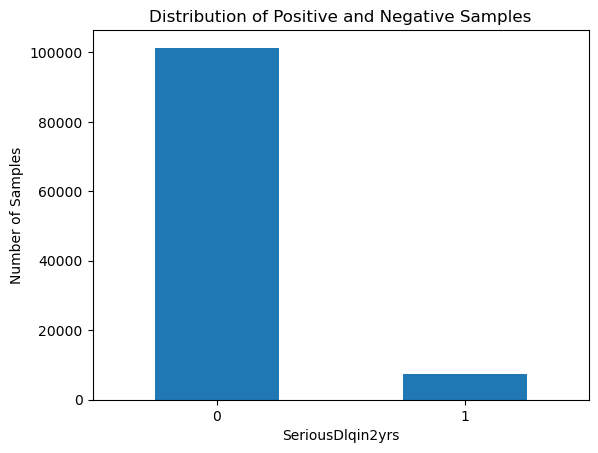

In [8]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts

# 查看正负样本分布情况
class_distribution = data['SeriousDlqin2yrs'].value_counts()
class_distribution


# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')

import matplotlib.pyplot as plt
# 绘制正负样本的柱状图
class_distribution.plot(kind='bar')
# 添加标题和标签（英文表达）
plt.title('Distribution of Positive and Negative Samples')
plt.xlabel('SeriousDlqin2yrs')  # 设置刻度标签水平
plt.ylabel('Number of Samples')
# 设置 x 轴刻度值垂直排列
plt.xticks(rotation=0)
# 显示图形
plt.show()

#### 2.数据预处理之离散化

In [9]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

# 计算年龄的分桶边界
age_bins = range(0, int(max(data['age']))+4, 3)

# 使用cut函数进行离散化
data['age_group'] = pd.cut(data['age'], bins=age_bins, right=False)

# 查看结果
# print(data[['age', 'age_group']].head())
data[['age', 'age_group']]

,age,age_group
0,45.0,"[45, 48)"
1,40.0,"[39, 42)"
2,38.0,"[36, 39)"
3,30.0,"[30, 33)"
4,49.0,"[48, 51)"
...,...,...
112910,50.0,"[48, 51)"
112911,74.0,"[72, 75)"
112912,44.0,"[42, 45)"
112913,30.0,"[30, 33)"


#### 3.数据预处理之独热向量编码

In [10]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

# 对年龄段进行独热向量编码
age_groups_encoded = pd.get_dummies(data['age_group'], prefix='age')

# 将独热编码添加回原始数据集
data = pd.concat([data, age_groups_encoded], axis=1)

# 查看结果
# print(data.head())
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group,"age_[0, 3)","age_[3, 6)","age_[6, 9)","age_[9, 12)","age_[12, 15)","age_[15, 18)","age_[18, 21)","age_[21, 24)","age_[24, 27)","age_[27, 30)","age_[30, 33)","age_[33, 36)","age_[36, 39)","age_[39, 42)","age_[42, 45)","age_[45, 48)","age_[48, 51)","age_[51, 54)","age_[54, 57)","age_[57, 60)","age_[60, 63)","age_[63, 66)","age_[66, 69)","age_[69, 72)","age_[72, 75)","age_[75, 78)","age_[78, 81)","age_[81, 84)","age_[84, 87)","age_[87, 90)","age_[90, 93)","age_[93, 96)","age_[96, 99)","age_[99, 102)","age_[102, 105)"
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"[45, 48)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"[39, 42)",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"[36, 39)",False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"[30, 33)",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"[48, 51)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"[48, 51)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"[72, 75)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"[42, 45)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"[30, 33)",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [11]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler


# 假设 data 是你的 DataFrame，包含目标变量和年龄分组特征
# 请确保年龄分组特征是连续值
continuous_feature = 'age'  # 替换为实际的连续值特征列名

# 提取连续值特征和目标变量
X = data[[continuous_feature]]
y = data['SeriousDlqin2yrs']

# 初始化 StandardScaler
scaler = StandardScaler()

# 对连续值特征进行幅度缩放
X_scaled = scaler.fit_transform(X)

# 将缩放后的值更新回原始的 DataFrame
data[continuous_feature] = X_scaled

# 查看结果
# print(data.head())
data


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group,"age_[0, 3)","age_[3, 6)","age_[6, 9)","age_[9, 12)","age_[12, 15)","age_[15, 18)","age_[18, 21)","age_[21, 24)","age_[24, 27)","age_[27, 30)","age_[30, 33)","age_[33, 36)","age_[36, 39)","age_[39, 42)","age_[42, 45)","age_[45, 48)","age_[48, 51)","age_[51, 54)","age_[54, 57)","age_[57, 60)","age_[60, 63)","age_[63, 66)","age_[66, 69)","age_[69, 72)","age_[72, 75)","age_[75, 78)","age_[78, 81)","age_[81, 84)","age_[84, 87)","age_[87, 90)","age_[90, 93)","age_[93, 96)","age_[96, 99)","age_[99, 102)","age_[102, 105)"
0,1,0.766127,-0.440122,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"[45, 48)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0.957151,-0.786059,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"[39, 42)",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0.658180,-0.924434,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"[36, 39)",False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.233810,-1.477933,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"[30, 33)",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.907239,-0.163372,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"[48, 51)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,-0.094185,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"[48, 51)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112911,0,0.040674,1.566312,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"[72, 75)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
112912,0,0.299745,-0.509309,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"[42, 45)",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112913,0,0.000000,-1.477933,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"[30, 33)",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [12]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
# 假设 data 是你的 DataFrame，包含目标变量和已缩放的连续值特征
# 请确保数据已经准备好，包含目标变量 'SeriousDlqin2yrs' 和已缩放的连续值特征 'age'

# 提取特征和目标变量
X = data[['age']]  # 替换为实际的特征列
y = data['SeriousDlqin2yrs']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 Logistic Regression 模型
model = LogisticRegression()

# 使用训练集拟合模型
model.fit(X_train, y_train)

# 取出 coef 属性
coefficients = model.coef_

# 查看结果
print("Logistic Regression Coefficients:", coefficients)



Logistic Regression Coefficients: [[-0.47055747]]


#####   分析
根据输出的系数 [-0.47055747]，可以解释为 Logistic Regression 模型中关于年龄的系数。由于这个系数是负数，意味着在这个模型中，年龄对于目标变量 SeriousDlqin2yrs 有负向影响。

具体来说，系数的负号表示随着年龄的增长，目标变量的概率会减小。这种情况可能是因为模型认为较年轻的人更有可能发生 SeriousDlqin2yrs。

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [13]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参


from sklearn.model_selection import GridSearchCV
# 准备网格搜索的参数字典
# param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}
param_grid = {'penalty': ['l2'], 'C': [1, 2 ,5, 10, 100,500]}

# 初始化 Logistic Regression 模型
model = LogisticRegression()
# 初始化 GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# 提取特征和目标变量
X = data[['age']]  # 替换为实际的特征列
y = data['SeriousDlqin2yrs']

# 进行网格搜索交叉验证
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 10, 100, 500], 'penalty': ['l2']},
             scoring='accuracy')

In [14]:
# 输出最好的超参数
# 输出最好的模型


# 输出最佳的超参数
print("最佳超参数：", grid_search.best_params_)
# 输出最佳的模型
best_model = grid_search.best_estimator_
print("最佳模型：", best_model)



最佳超参数： {'C': 1, 'penalty': 'l2'}
最佳模型： LogisticRegression(C=1)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [15]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score
# 使用之前得到的最佳模型在测试集上进行预测
y_pred = best_model.predict(X_test)

# 计算查准率
precision = accuracy_score(y_test, y_pred)
print("查准率 (Accuracy):", precision)

# 计算查全率
recall = recall_score(y_test, y_pred)
print("查全率 (Recall):", recall)

# 计算AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:")
print(conf_matrix)

# 计算F1值
f1 = f1_score(y_test, y_pred)
print("F1值:", f1)


查准率 (Accuracy): 0.9317073170731708
查全率 (Recall): 0.0
AUC: 0.5
混淆矩阵:
[[20246     0]
 [ 1484     0]]
F1值: 0.0


In [16]:
# !pip install imblearn

In [17]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 使用更复杂的随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 使用SMOTE进行过采样
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 训练模型
model.fit(X_resampled, y_resampled)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算查准率、查全率、AUC、混淆矩阵和F1值
precision = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 输出结果
print("查准率 (Accuracy):", precision)
print("查全率 (Recall):", recall)
print("AUC:", auc)
print("混淆矩阵:")
print(conf_matrix)
print("F1值:", f1)

查准率 (Accuracy): 0.4578002761159687
查全率 (Recall): 0.7277628032345014
AUC: 0.5828876250687967
混淆矩阵:
[[ 8868 11378]
 [  404  1080]]
F1值: 0.15492755702194808


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [18]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 使用最佳模型在测试集上预测概率
y_prob = best_model.predict_proba(X_test)[:, 1]

# 将阈值设定为
threshold = 0.1
y_pred_adjusted = (y_prob > threshold).astype(int)

# 计算查准率、查全率、AUC、混淆矩阵和F1值
precision_adjusted = accuracy_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
auc_adjusted = roc_auc_score(y_test, y_prob)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

# 输出调整阈值后的结果
print("调整阈值后的查准率 (Accuracy):", precision_adjusted)
print("调整阈值后的查全率 (Recall):", recall_adjusted)
print("调整阈值后的AUC:", auc_adjusted)
print("调整阈值后的混淆矩阵:")
print(conf_matrix_adjusted)
print("调整阈值后的F1值:", f1_adjusted)


调整阈值后的查准率 (Accuracy): 0.8242982052462035
调整阈值后的查全率 (Recall): 0.2082210242587601
调整阈值后的AUC: 0.6089906981060184
调整阈值后的混淆矩阵:
[[17603  2643]
 [ 1175   309]]
调整阈值后的F1值: 0.13931469792605952


In [19]:
# 给定的阈值列表
# thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


import numpy as np
# 生成阈值列表
start = 1
end = 31
step = 1
thresholds = np.arange(start, end, step) / 100

# thresholds = np.arange(0.01, 0.31, 0.01).tolist()
# 打印阈值列表
print(thresholds)


# 初始化列表来存储不同阈值下的结果
precisions = []
recalls = []
aucs = []
conf_matrices = []
f1_scores = []

# 对每个阈值进行循环测试
for threshold in thresholds:
    # 将概率判定的阈值设定为当前值
    y_pred_adjusted = (y_prob > threshold).astype(int)
    
    # 计算相应的评估指标
    precision_adjusted = accuracy_score(y_test, y_pred_adjusted)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    auc_adjusted = roc_auc_score(y_test, y_prob)
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)
    
    # 将结果存储到列表中
    precisions.append(precision_adjusted)
    recalls.append(recall_adjusted)
    aucs.append(auc_adjusted)
    conf_matrices.append(conf_matrix_adjusted)
    f1_scores.append(f1_adjusted)

# # 输出结果
# for i, threshold in enumerate(thresholds):
#     print(f"\n阈值为 {threshold} 时的结果：")
#     print("查准率 (Accuracy):", precisions[i])
#     print("查全率 (Recall):", recalls[i])
#     print("AUC:", aucs[i])
#     print("混淆矩阵:")
#     print(conf_matrices[i])
#     print("F1值:", f1_scores[i])


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3 ]


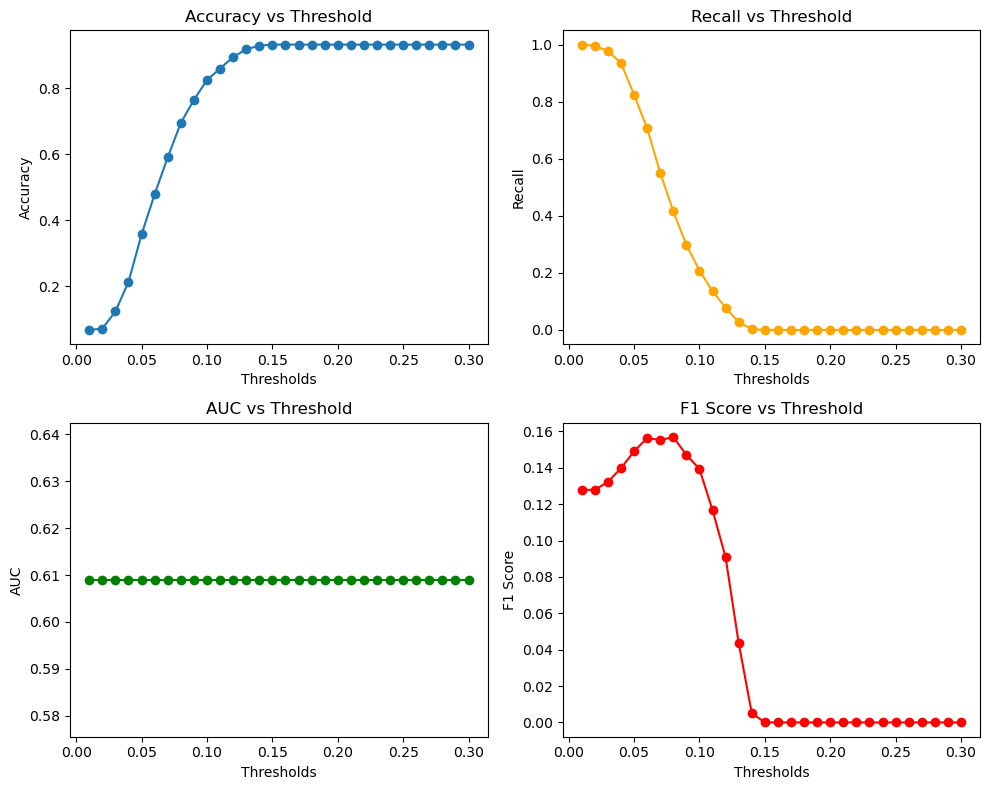

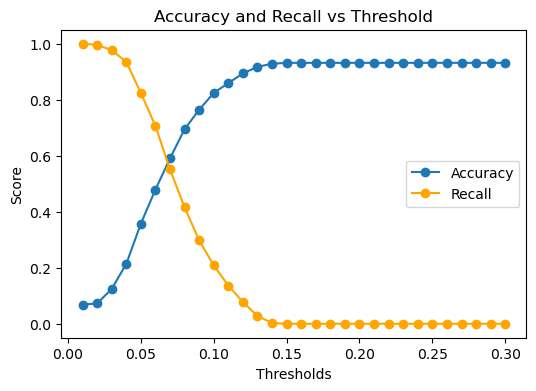

In [20]:
# 就是要可视化才能直接一眼丁真（看出来）啊

import matplotlib.pyplot as plt


# 给定的阈值列表
# thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 初始化列表来存储不同阈值下的指标
accuracies = []
recalls = []
aucs = []
f1_scores = []

# 对每个阈值进行循环测试
for threshold in thresholds:
    # 将概率判定的阈值设定为当前值
    y_pred_adjusted = (y_prob > threshold).astype(int)
    
    # 计算相应的评估指标
    accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    auc_adjusted = roc_auc_score(y_test, y_prob)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)
    
    # 将结果存储到列表中
    accuracies.append(accuracy_adjusted)
    recalls.append(recall_adjusted)
    aucs.append(auc_adjusted)
    f1_scores.append(f1_adjusted)

# 创建一个大图，包含多个子图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# 子图1：准确率 vs 阈值
axes[0, 0].plot(thresholds, accuracies, marker='o')
axes[0, 0].set_title('Accuracy vs Threshold')
axes[0, 0].set_xlabel('Thresholds')
axes[0, 0].set_ylabel('Accuracy')

# 子图2：查全率 vs 阈值
axes[0, 1].plot(thresholds, recalls, marker='o', color='orange')
axes[0, 1].set_title('Recall vs Threshold')
axes[0, 1].set_xlabel('Thresholds')
axes[0, 1].set_ylabel('Recall')

# 子图3：AUC vs 阈值
axes[1, 0].plot(thresholds, aucs, marker='o', color='green')
axes[1, 0].set_title('AUC vs Threshold')
axes[1, 0].set_xlabel('Thresholds')
axes[1, 0].set_ylabel('AUC')

# 子图4：F1值 vs 阈值
axes[1, 1].plot(thresholds, f1_scores, marker='o', color='red')
axes[1, 1].set_title('F1 Score vs Threshold')
axes[1, 1].set_xlabel('Thresholds')
axes[1, 1].set_ylabel('F1 Score')

# 调整子图的布局
plt.tight_layout()
plt.show()




# 初始化列表来存储不同阈值下的指标
accuracies = []
recalls = []

# 对每个阈值进行循环测试
for threshold in thresholds:
    # 将概率判定的阈值设定为当前值
    y_pred_adjusted = (y_prob > threshold).astype(int)
    
    # 计算相应的评估指标
    accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    
    # 将结果存储到列表中
    accuracies.append(accuracy_adjusted)
    recalls.append(recall_adjusted)

# 创建一个大图
plt.figure(figsize=(6,4))

# 准确率 vs 阈值
plt.plot(thresholds, accuracies, marker='o', label='Accuracy')
# 召回率 vs 阈值
plt.plot(thresholds, recalls, marker='o', color='orange', label='Recall')

# 设置标题和标签
plt.title('Accuracy and Recall vs Threshold')
plt.xlabel('Thresholds')
plt.ylabel('Score')

# 添加图例
plt.legend()

# 显示图形
plt.show()



由于y.mean()=0.06，且在0.1附近才有变化
阈值可能和样本的非平衡程度呈线性关系？

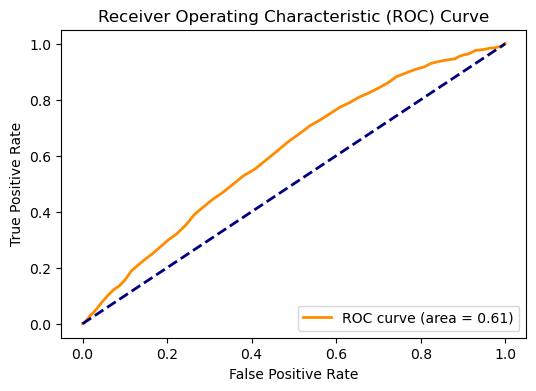

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算 ROC 曲线和 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [22]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

# 引入包
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import zipfile

# 打开数据并预处理数据，切分数据
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# # 查看平均的欺诈率
# y.mean()
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipykernel_87929/2399350575.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


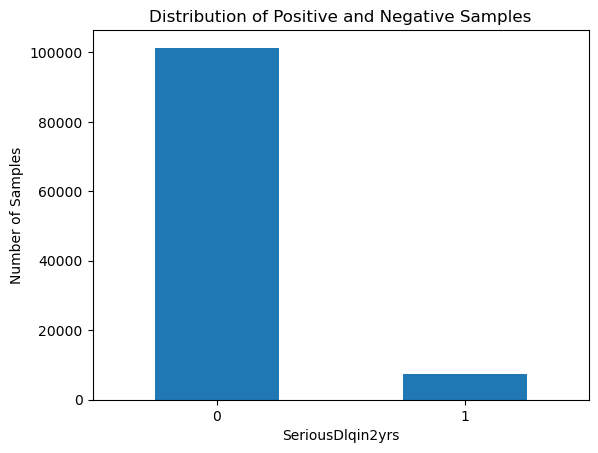

In [23]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
# 查看正负样本分布情况
class_distribution = data['SeriousDlqin2yrs'].value_counts()
class_distribution
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
# 绘制正负样本的柱状图
class_distribution.plot(kind='bar')
# 添加标题和标签（英文表达）
plt.title('Distribution of Positive and Negative Samples')
plt.xlabel('SeriousDlqin2yrs')  # 设置刻度标签水平
plt.ylabel('Number of Samples')
# 设置 x 轴刻度值垂直排列
plt.xticks(rotation=0)
# 显示图形
plt.show()

In [24]:
# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 初始化逻辑回归模型
logreg = LogisticRegression()

# 使用 SelectFromModel 进行特征选择
sfm = SelectFromModel(logreg)
sfm.fit(X_train_scaled, y_train)

# 打印选择的特征
selected_features = X_train.columns[sfm.get_support()]
print("Selected Features:")
print(selected_features)


# 应用特征选择到训练集和测试集
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)




# 重新建模
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_selected, y_train)
# 在测试集上进行预测
y_pred_selected = logreg_selected.predict(X_test_selected)
# 评估模型性能
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
classification_report_selected = classification_report(y_test, y_pred_selected)

# 打印模型性能指标
print("Accuracy:", accuracy_selected)
print("Confusion Matrix:")
print(conf_matrix_selected)
print("Classification Report:")
print(classification_report_selected)

Selected Features:
Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')
Accuracy: 0.9329038196042337
Confusion Matrix:
[[20203    43]
 [ 1415    69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     20246
           1       0.62      0.05      0.09      1484

    accuracy                           0.93     21730
   macro avg       0.78      0.52      0.53     21730
weighted avg       0.91      0.93      0.91     21730



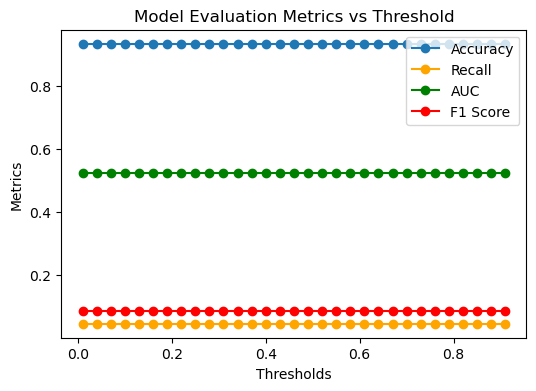

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score

# 给定的阈值列表
thresholds = np.arange(0.01, 0.91, 0.03).tolist()

# 初始化列表来存储不同阈值下的指标
accuracies = []
recalls = []
aucs = []
f1_scores = []

# 对每个阈值进行循环测试
for threshold in thresholds:
    # 将概率判定的阈值设定为当前值
    y_pred_adjusted = (y_pred_selected > threshold).astype(int)
    
    # 计算相应的评估指标
    accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    auc_adjusted = roc_auc_score(y_test, y_pred_selected)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)
    
    # 将结果存储到列表中
    accuracies.append(accuracy_adjusted)
    recalls.append(recall_adjusted)
    aucs.append(auc_adjusted)
    f1_scores.append(f1_adjusted)

# 创建一个大图
plt.figure(figsize=(6, 4))

# 准确率 vs 阈值
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')

# 召回率 vs 阈值
plt.plot(thresholds, recalls, label='Recall', marker='o', color='orange')

# AUC vs 阈值
plt.plot(thresholds, aucs, label='AUC', marker='o', color='green')

# F1值 vs 阈值
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o', color='red')

# 添加标题和标签
plt.title('Model Evaluation Metrics vs Threshold')
plt.xlabel('Thresholds')
plt.ylabel('Metrics')

# 添加图例
plt.legend()

# 显示图形
plt.show()


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [26]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)


# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print("训练集 X 形状:", X_train.shape)
print("测试集 X 形状:", X_test.shape)
print("训练集 y 形状:", y_train.shape)
print("测试集 y 形状:", y_test.shape)


训练集 X 形状: (86918, 10)
测试集 X 形状: (21730, 10)
训练集 y 形状: (86918,)
测试集 y 形状: (21730,)


/tmp/ipykernel_87929/3952870689.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


随机森林

In [27]:
# 清除缺失值
data.dropna(inplace=True)

# 提取目标变量和特征变量
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 随机森林
rf_model = RandomForestClassifier(random_state=42)

# 网格搜索交叉验证进行调参
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
# param_grid = {'n_estimators': [50,], 'max_depth': [None, 10,]} #短时间测试

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# 进行网格搜索交叉验证
grid_search_rf.fit(X_train, y_train)

# 输出最好的超参数
print("Best Parameters:", grid_search_rf.best_params_)

# 得到最佳模型
best_rf_model = grid_search_rf.best_estimator_

# 在测试集上进行预测
y_pred_rf = best_rf_model.predict(X_test)

# 输出分类报告等评估指标
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'n_estimators': 50}

Accuracy: 0.9354348826507133
Confusion Matrix:
 [[20100   146]
 [ 1257   227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     20246
           1       0.61      0.15      0.24      1484

    accuracy                           0.94     21730
   macro avg       0.77      0.57      0.61     21730
weighted avg       0.92      0.94      0.92     21730



支持向量机

In [6]:
# 支持向量机
from sklearn.svm import SVC



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 数据预处理，包括去除NaN值和标准化
data.dropna(inplace=True)
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM模型
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))

# 网格搜索交叉验证进行调参
# param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
# param_grid_svm = {'svc__C': [ 1 ], 'svc__kernel': ['rbf']}
param_grid_svm = {'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy')



# 进行网格搜索交叉验证
grid_search_svm.fit(X_train, y_train)

# 输出最好的超参数
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# 得到最佳SVM模型
best_svm_model = grid_search_svm.best_estimator_

# 在测试集上进行预测
y_pred_svm = best_svm_model.predict(X_test)

# 输出分类报告等评估指标
print("\nAccuracy for SVM:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


Best Parameters for SVM: {'svc__C': 1, 'svc__kernel': 'rbf'}

Accuracy for SVM: 0.9339162448228255
Confusion Matrix for SVM:
 [[20217    29]
 [ 1407    77]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     20246
           1       0.73      0.05      0.10      1484

    accuracy                           0.93     21730
   macro avg       0.83      0.53      0.53     21730
weighted avg       0.92      0.93      0.91     21730



In [7]:
# 支持向量机
from sklearn.svm import SVC



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 数据预处理，包括去除NaN值和标准化
data.dropna(inplace=True)
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM模型
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))

# 网格搜索交叉验证进行调参
# param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
# param_grid_svm = {'svc__C': [ 1 ], 'svc__kernel': ['rbf']}
param_grid_svm = {'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy')



# 进行网格搜索交叉验证
grid_search_svm.fit(X_train, y_train)

# 输出最好的超参数
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# 得到最佳SVM模型
best_svm_model = grid_search_svm.best_estimator_

# 在测试集上进行预测
y_pred_svm = best_svm_model.predict(X_test)

# 输出分类报告等评估指标
print("\nAccuracy for SVM:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


K最近邻

In [27]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier

# 数据预处理，包括去除NaN值和标准化
data.dropna(inplace=True)
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN模型
knn_model = KNeighborsClassifier()

# 网格搜索交叉验证进行调参
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
# param_grid_knn = {'n_neighbors': [3], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')

# 进行网格搜索交叉验证
grid_search_knn.fit(X_train, y_train)

# 输出最好的超参数
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# 得到最佳KNN模型
best_knn_model = grid_search_knn.best_estimator_

# 在测试集上进行预测
y_pred_knn = best_knn_model.predict(X_test)

# 输出分类报告等评估指标
print("\nAccuracy for KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}

Accuracy for KNN: 0.9317993557294063
Confusion Matrix for KNN:
 [[20237     9]
 [ 1473    11]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     20246
           1       0.55      0.01      0.01      1484

    accuracy                           0.93     21730
   macro avg       0.74      0.50      0.49     21730
weighted avg       0.91      0.93      0.90     21730

